In [ ]:
!pip install aequitas

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.2/731.2 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.3/232.3 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:

# 1. 데이터 로드 및 분리
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Base.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Train Data: (794989, 29), (794989,)
Test Data: (205011, 29), (205011,)
After SMOTE - Train Data: (1573676, 45), (1573676,)
Evaluating Logistic Regression...


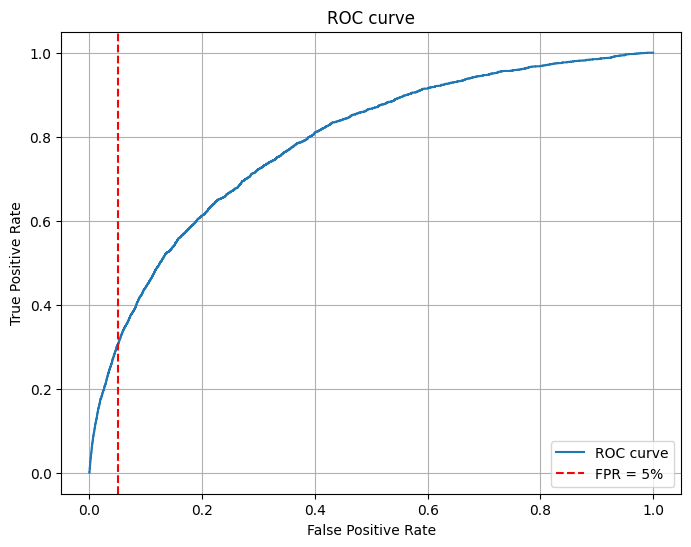

AUC: 0.7848
TPR:  30.44%
FPR:  4.98%
Threshold:  0.50
Predictive Equality:  68.25%
Evaluating Random Forest...


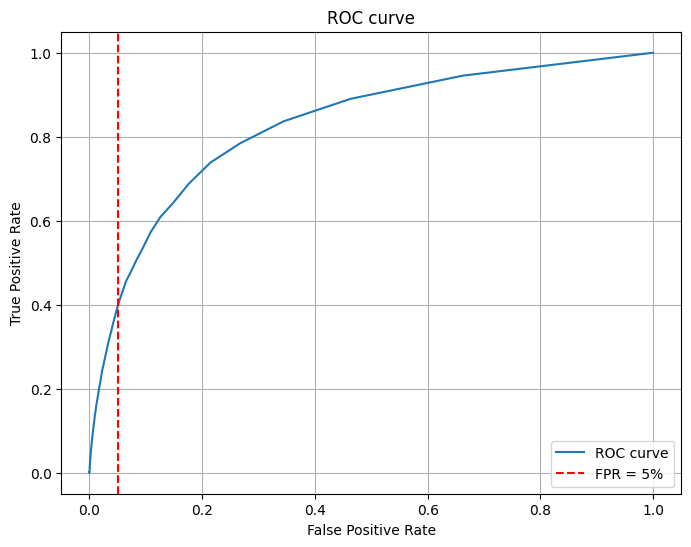

AUC: 0.8275
TPR:  38.05%
FPR:  4.68%
Threshold:  0.16
Predictive Equality:  53.53%
Evaluating Gradient Boosting...


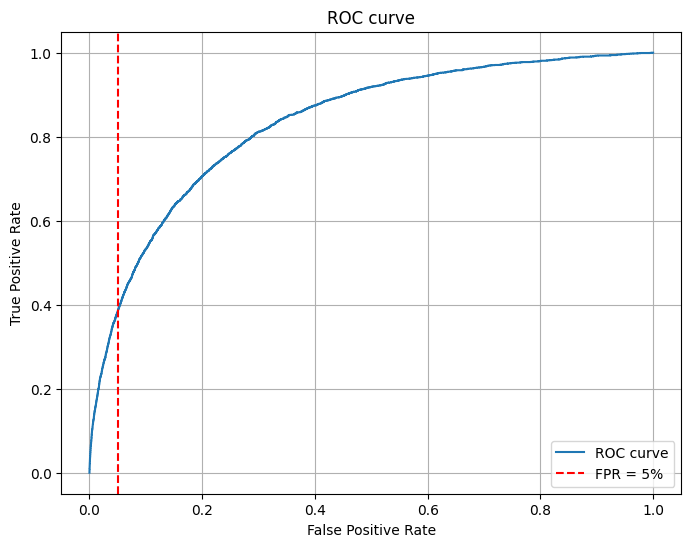

AUC: 0.8334
TPR:  38.43%
FPR:  5.00%
Threshold:  0.32
Predictive Equality:  66.32%
Evaluating Decision Tree...


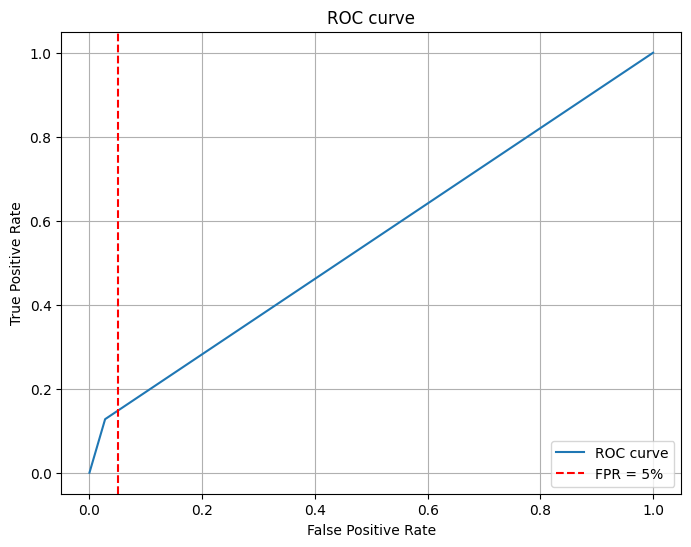

AUC: 0.5499
TPR:  12.75%
FPR:  2.78%
Threshold:  1.00
Predictive Equality:  46.18%
Evaluating Naive Bayes...


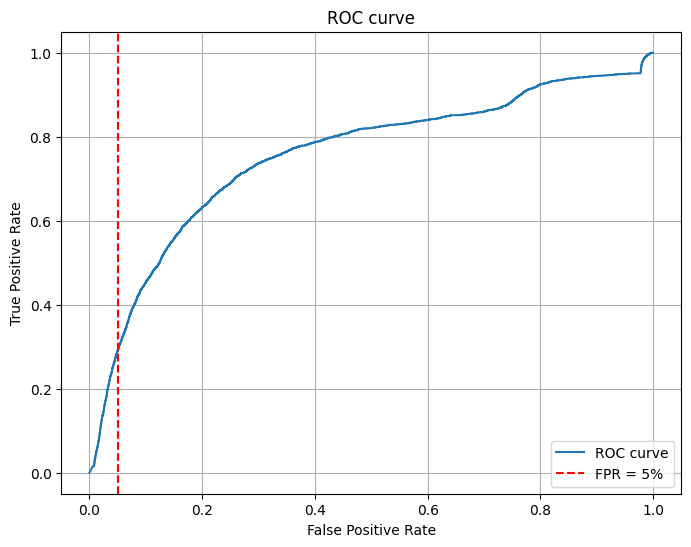

AUC: 0.7534
TPR:  29.05%
FPR:  5.00%
Threshold:  1.00
Predictive Equality:  71.35%
[LightGBM] [Info] Number of positive: 786838, number of negative: 786838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.637932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3777
[LightGBM] [Info] Number of data points in the train set: 1573676, number of used features: 45
Evaluating LightGBM...


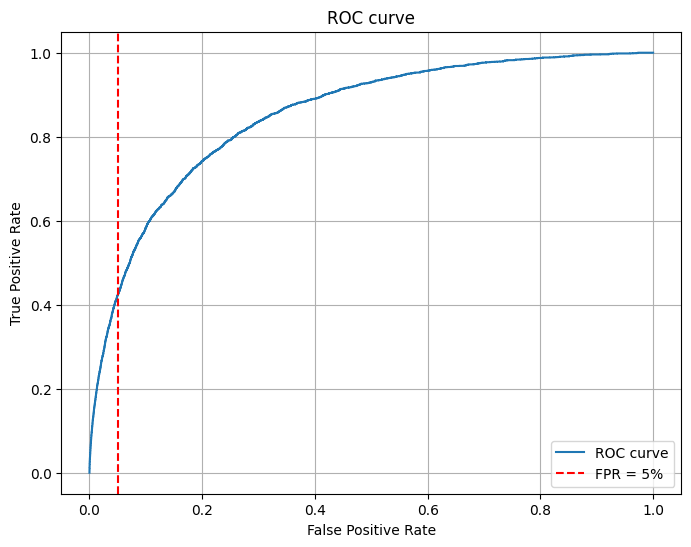

AUC: 0.8516
TPR:  42.25%
FPR:  5.00%
Threshold:  0.11
Predictive Equality:  50.83%
Evaluating XGBoost...


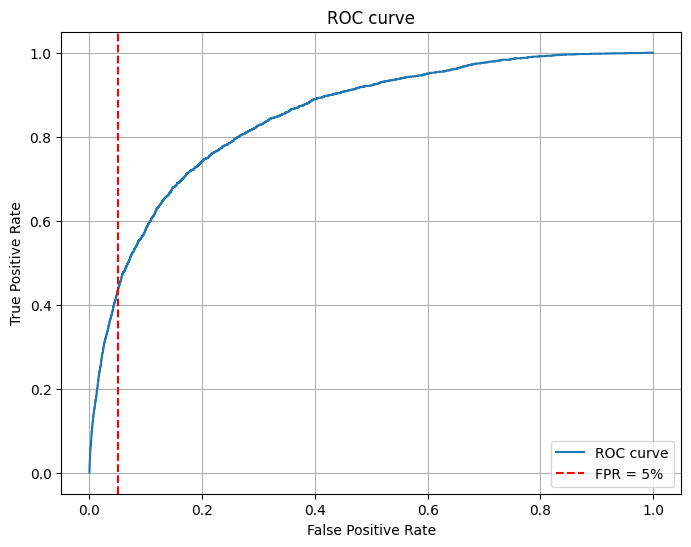

AUC: 0.8498
TPR:  43.29%
FPR:  4.99%
Threshold:  0.09
Predictive Equality:  52.68%

Model Performance Summary:
                 Model TPR at FPR=5% Fairness Predictive Equality
0  Logistic Regression        30.44%                       68.25%
1        Random Forest        38.05%                       53.53%
2    Gradient Boosting        38.43%                       66.32%
3        Decision Tree        12.75%                       46.18%
4          Naive Bayes        29.05%                       71.35%
5             LightGBM        42.25%                       50.83%
6              XGBoost        43.29%                       52.68%


In [ ]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from aequitas.group import Group
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# 공통 코드: ROC Curve 시각화
def plot_roc(fpr, tpr):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC curve')
    plt.axvline(x=0.05, color='red', linestyle='--', label='FPR = 5%')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# 공통 코드: 공정성 지표 생성
def get_fairness_metrics(y_true, y_pred, groups, FIXED_FPR):
    g = Group()
    aequitas_df = pd.DataFrame(
        {"score": y_pred,
         "label_value": y_true,
         "group": groups}
    )
    disparities_df = g.get_crosstabs(aequitas_df, score_thresholds={"score_val": [FIXED_FPR]})[0]
    predictive_equality = disparities_df["fpr"].min() / disparities_df["fpr"].max()
    return predictive_equality, disparities_df

# 공통 코드: 평가 함수
def evaluate(predictions, FIXED_FPR=0.05):
    fprs, tprs, thresholds = roc_curve(y_test, predictions)
    plot_roc(fprs, tprs)  # 공통 코드 호출

    valid_indices = np.where(fprs <= FIXED_FPR)[0]
    if len(valid_indices) > 0:
        tpr = tprs[valid_indices][-1]
        fpr = fprs[valid_indices][-1]
        threshold = thresholds[valid_indices][-1]
    else:
        tpr = 0.0
        fpr = FIXED_FPR
        threshold = None

    auc = roc_auc_score(y_test, predictions)
    predictive_equality, disparities_df = get_fairness_metrics(y_test, predictions, groups_test, FIXED_FPR)

    # 출력 형식
    to_pct = lambda x: f"{x * 100:.2f}%"
    print(f"AUC: {auc:.4f}")
    print(f"TPR:  {to_pct(tpr)}")
    print(f"FPR:  {to_pct(fpr)}")
    print(f"Threshold:  {threshold:.2f}" if threshold is not None else "Threshold: N/A")
    print(f"Predictive Equality:  {to_pct(predictive_equality)}")

    return tpr, predictive_equality

# 전체가 0인 device_fraud_count 컬럼 삭제
data.drop('device_fraud_count', axis=1, inplace=True)

# month 기준으로 데이터 분리
train_data = data[data['month'] < 6]
test_data = data[data['month'] >= 6]

# 학습 데이터와 테스트 데이터 분리
X_train = train_data.drop(columns=['fraud_bool'])
y_train = train_data['fraud_bool']
X_test = test_data.drop(columns=['fraud_bool'])
y_test = test_data['fraud_bool']

X_train.drop('month', axis=1, inplace=True)
X_test.drop('month', axis=1, inplace=True)

print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Test Data: {X_test.shape}, {y_test.shape}")

# 2. 오버샘플링 (SMOTE)
smote = SMOTE(random_state=0)

# 범주형 데이터 인코딩
categorical_columns = X_train.select_dtypes(include=['object']).columns
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# 테스트 데이터와 학습 데이터의 열 맞춤
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# SMOTE 적용
X_train, y_train = smote.fit_resample(X_train, y_train)

print(f"After SMOTE - Train Data: {X_train.shape}, {y_train.shape}")

# 3. 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. 그룹 정의
groups = (data["customer_age"] > 50).map({True: ">50", False: "<=50"})
groups_test = groups.loc[X_test.index]

# 5. 모델 리스트 정의
models = [
    ("Logistic Regression", LogisticRegression(random_state=0, max_iter=1000)),
    ("Random Forest", RandomForestClassifier(random_state=0)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=0)),
    ("Decision Tree", DecisionTreeClassifier(random_state=0)),
    ("Naive Bayes", GaussianNB()),
    ("LightGBM", LGBMClassifier(boost_from_average=False)),
    ("XGBoost", XGBClassifier())
]

# 6. 모델 평가
model_results = []
for name, model in models:
    try:
        # 학습 데이터 선택
        X_train_data = X_train_scaled if name in ["Logistic Regression", "Naive Bayes"] else X_train
        X_test_data = X_test_scaled if name in ["Logistic Regression", "Naive Bayes"] else X_test

        # 모델 학습
        model.fit(X_train_data, y_train)

        # 테스트 데이터 예측
        y_proba = model.predict_proba(X_test_data)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_data)

        # 평가
        print(f"Evaluating {name}...")
        tpr, fairness = evaluate(y_proba, FIXED_FPR=0.05)

        # 결과 저장
        model_results.append((name, tpr, fairness))
    except Exception as e:
        print(f"Error with {name}: {e}")

# 7. 결과 데이터프레임 생성
results_df = pd.DataFrame(model_results, columns=["Model", "TPR at FPR=5%", "Fairness Predictive Equality"])

# 퍼센트 포맷 적용
results_df["TPR at FPR=5%"] = results_df["TPR at FPR=5%"].apply(lambda x: f"{x * 100:.2f}%")
results_df["Fairness Predictive Equality"] = results_df["Fairness Predictive Equality"].apply(lambda x: f"{x * 100:.2f}%")

# 결과 출력
print("\nModel Performance Summary:")
print(results_df)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 데이터프레임 생성
data1 = {
    "Model": [
        "Logistic Regression", "Random Forest", "Gradient Boosting",
        "Decision Tree", "Naive Bayes", "LightGBM", "XGBoost"
    ],
    "TPR at FPR=5%": [30.44, 38.05, 38.43, 12.75, 29.05, 42.25, 43.29],
    "Fairness Predictive Equality": [68.25, 53.53, 66.32, 46.18, 71.35, 50.83, 52.68],
}

data2 = {
    "Model": [
        "Logistic Regression", "Random Forest", "Gradient Boosting",
        "Decision Tree", "Naive Bayes", "LightGBM", "XGBoost"
    ],
    "TPR at FPR=5%": [49.72, 44.96, 52.05, 0.00, 33.95, 52.68, 47.53],
    "Fairness Predictive Equality": [92.00, 99.10, 95.82, 68.02, 71.45, 89.43, 78.03],
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# 그래프 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# 첫 번째 데이터셋
axes[0].bar(df1["Model"], df1["TPR at FPR=5%"], label="TPR at FPR=5%", alpha=0.7, color='skyblue')
axes[0].bar(df1["Model"], df1["Fairness Predictive Equality"], label="Fairness Predictive Equality", alpha=0.7, color='orange')
axes[0].set_title("Performance: Dataset 1")
axes[0].set_ylabel("Percentage")
axes[0].set_xlabel("Model")
axes[0].legend()
axes[0].set_xticklabels(df1["Model"], rotation=45, ha='right')

# 두 번째 데이터셋
axes[1].bar(df2["Model"], df2["TPR at FPR=5%"], label="TPR at FPR=5%", alpha=0.7, color='skyblue')
axes[1].bar(df2["Model"], df2["Fairness Predictive Equality"], label="Fairness Predictive Equality", alpha=0.7, color='orange')
axes[1].set_title("Performance: Dataset 2")
axes[1].set_xlabel("Model")
axes[1].legend()
axes[1].set_xticklabels(df2["Model"], rotation=45, ha='right')

plt.tight_layout()
plt.show()
